In [1]:
from src.hmm import HMM, load_hmm, process_inputs
from src.data import load_kfold_brown_corpus
from src.metrics import accuracy, tagwise_accuracy, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

/opt/homebrew/Caskroom/miniconda/base/envs/CS626-A1/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[nltk_data] Downloading package punkt to /Users/stark/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /Users/stark/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package brown to /Users/stark/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package universal_tagset to
[nltk_data]     /Users/stark/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


In [2]:
splits = load_kfold_brown_corpus(n_splits=5)

In [3]:
best_fold = 4

In [4]:
trainX, trainY, testX, testY = splits[best_fold-1]

In [5]:
model = load_hmm(f"hmm_fold_{best_fold}.pkl")

In [6]:
testX = process_inputs(testX, split=True)

Processing Input data..: 100%|██████████| 11468/11468 [00:00<00:00, 112748.42it/s]


In [7]:
test_predictions = model.predict(testX)

Predicting..: 100%|██████████| 11468/11468 [00:15<00:00, 764.47it/s] 


In [8]:
accuracy(test_predictions, testY)

0.9429666616717985

In [9]:
tagwise_accuracy(test_predictions, testY, model.tag2idx, model.idx2tag)

{'PRT': 0.8875710804224208,
 'ADJ': 0.8738480132950597,
 'ADP': 0.9645442277021224,
 'CONJ': 0.9943563148261135,
 'NUM': 0.8157181571815718,
 'NOUN': 0.9344740594493802,
 'VERB': 0.9191861133463617,
 '.': 0.9997491938373343,
 'ADV': 0.8501153668666359,
 'PRON': 0.9859432105707057,
 'X': 0.39069767441860465,
 'DET': 0.9829285390293184}

In [10]:
cm = confusion_matrix(test_predictions, testY, model.tag2idx)

In [11]:
cm.shape

(12, 12)

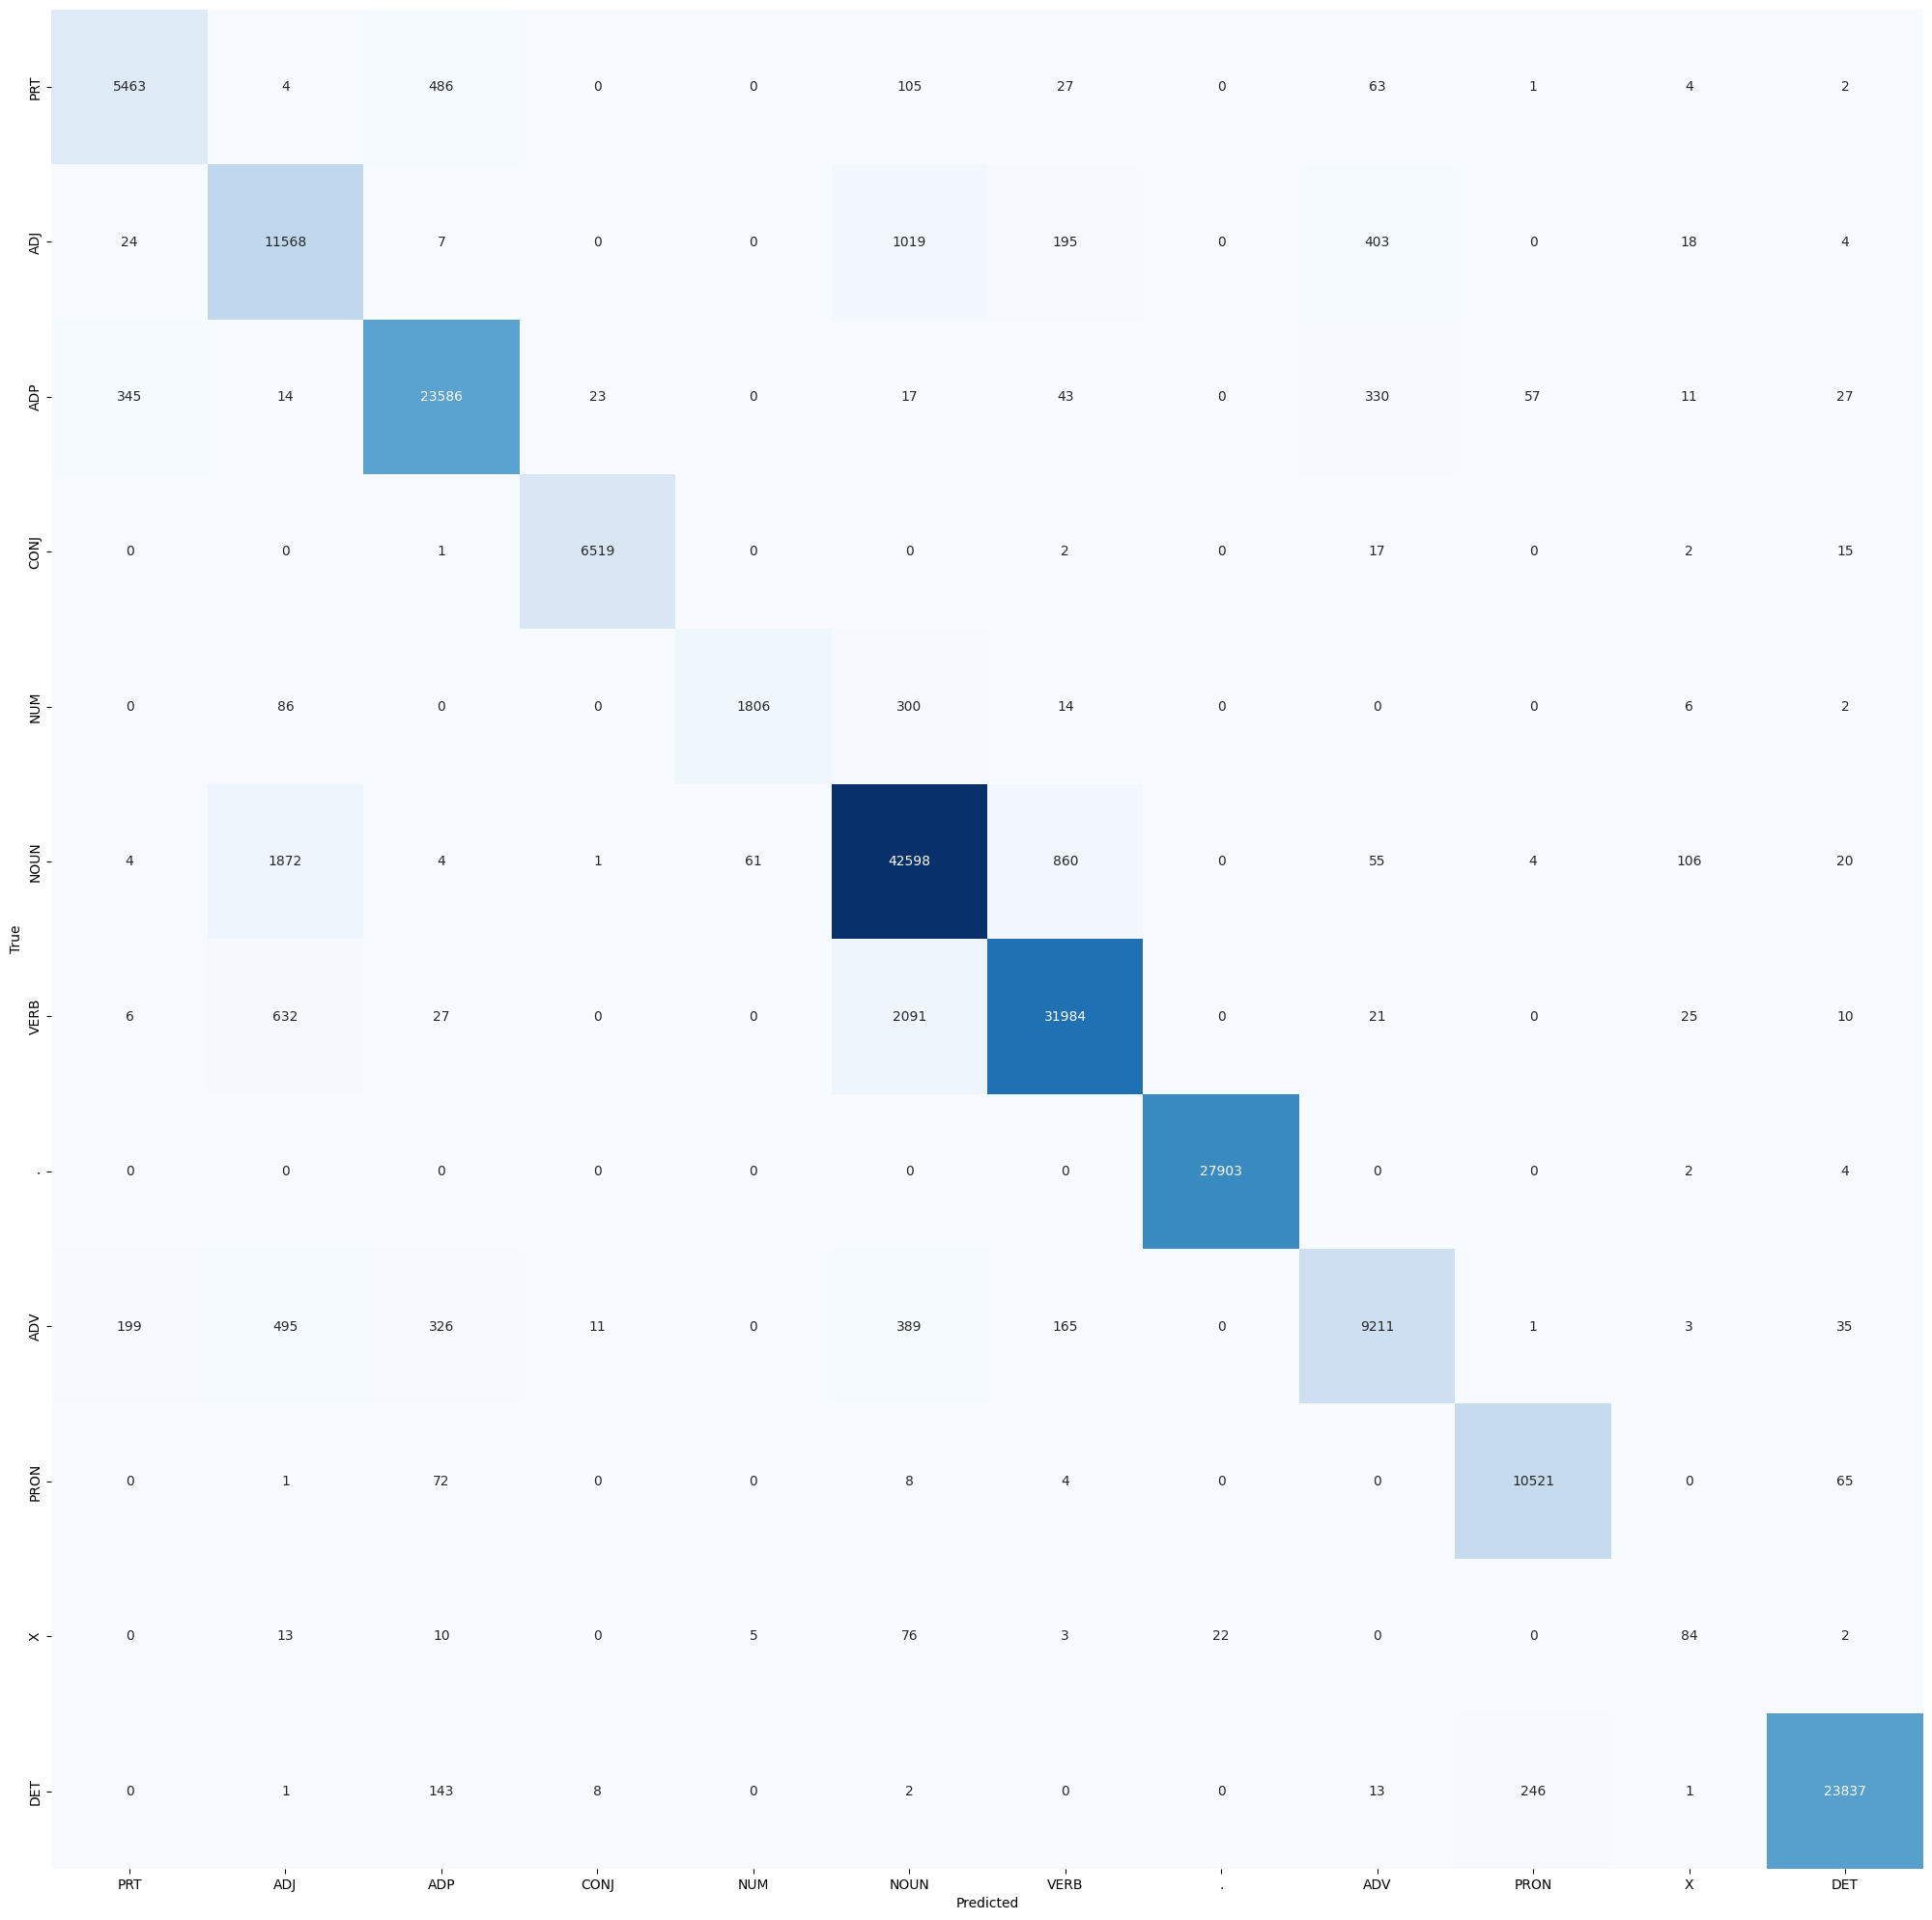

In [12]:
pos_tags = list(model.tag2idx.keys())[2:]
plt.figure(figsize=(25, 25))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=pos_tags, yticklabels=pos_tags, cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()